
# Anscombe's quartet
Example of the importance of visualizing data before analyzing it adapter from the [Matplotlib documentation](https://matplotlib.org/stable/gallery/specialty_plots/anscombe.html).
`Anscombe's quartet` is a group of datasets (x, y) that have the same mean, standard deviation, and regression line, but which are qualitatively different.

It is often used to illustrate the importance of looking at a set of data graphically and not only relying on basic statistic properties.

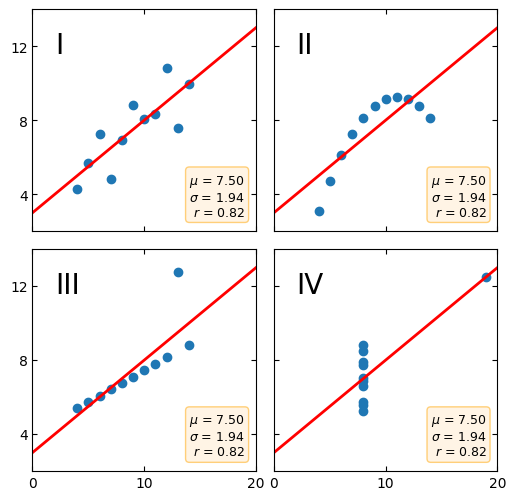

In [1]:
# Load libraries
import matplotlib.pyplot as plt
import numpy as np

# Define the four datasets from Anscombe's quartet
x = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74])
y3 = np.array([7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73])
x4 = np.array([8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8])
y4 = np.array([6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89])

datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

# Pre-compute statistics for all datasets (mean, std, correlation, regression line)
stats_data = {}
for label, (x_vals, y_vals) in datasets.items():
    p1, p0 = np.polyfit(x_vals, y_vals, deg=1)  # Get slope and intercept
    corr = np.corrcoef(x_vals, y_vals)[0, 1]    # Calculate correlation coefficient
    stats_data[label] = {
        'slope': p1, 'intercept': p0,
        'mean': np.mean(y_vals), 'std': np.std(y_vals),
        'corr': corr
    }

# Create a 2x2 grid of subplots with shared axes
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14), xticks=(0, 10, 20), yticks=(4, 8, 12))

# Plot each dataset
bbox = dict(boxstyle='round', fc='blanchedalmond', ec='orange', alpha=0.5)
for ax, (label, (x_vals, y_vals)) in zip(axs.flat, datasets.items()):
    ax.tick_params(direction='in', top=True, right=True)
    ax.plot(x_vals, y_vals, 'o')  # Scatter plot
    
    # Overlay regression line
    stats = stats_data[label]
    ax.axline(xy1=(0, stats['intercept']), slope=stats['slope'], color='r', lw=2)
    
    # Add dataset label and statistics box
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    stats_text = (f'$\\mu$ = {stats["mean"]:.2f}\n'
                  f'$\\sigma$ = {stats["std"]:.2f}\n'
                  f'$r$ = {stats["corr"]:.2f}')
    ax.text(0.95, 0.07, stats_text, fontsize=9, bbox=bbox,
            transform=ax.transAxes, horizontalalignment='right')